In [1]:
IMAGE_PATH=r"C:\Users\thooy\Downloads\Evaluation_Set\1.png"

In [2]:
    #green 
#note down value
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.stats import entropy as scipy_entropy
from scipy.ndimage import median_filter

In [3]:

def calculate_entropy(image):
        hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
        hist = hist / np.sum(hist)
        return scipy_entropy(hist)

    # Function to calculate Contrast Improvement Index (CII)
def calculate_cii(original, processed):
    cii = processed.std() / (original.std() + 1e-8)
    return cii

# Display function for side-by-side comparison
def display_results(original, processed, title):
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))
    axs[0, 0].imshow(original, cmap='gray')
    axs[0, 0].set_title('Original Green Channel')
    axs[0, 1].imshow(processed, cmap='gray')
    axs[0, 1].set_title(title)

    # Histograms
    axs[1, 0].hist(original.ravel(), bins=256, color='green')
    axs[1, 0].set_title('Original Histogram')
    axs[1, 1].hist(processed.ravel(), bins=256, color='green')
    axs[1, 1].set_title(f'{title} Histogram')

    for ax in axs.flat:
        ax.label_outer()
    
    plt.show()
def show_enhancement(image):

    # Function to calculate entropy
    green_channel=image

    # 1. Histogram Equalization
    equalized = cv2.equalizeHist(green_channel)
    display_results(green_channel, equalized, 'Histogram Equalization')
    print("PSNR:", psnr(green_channel, equalized))
    print("CII:", calculate_cii(green_channel, equalized))
    print("Entropy:", calculate_entropy(equalized))

    # 2. Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(green_channel)
    display_results(green_channel, clahe_image, 'CLAHE')
    print("PSNR:", psnr(green_channel, clahe_image))
    print("CII:", calculate_cii(green_channel, clahe_image))
    print("Entropy:", calculate_entropy(clahe_image))

    # 3. Gamma Correction
    gamma = 2.0
    gamma_corrected = np.array(255 * (green_channel / 255) ** gamma, dtype='uint8')
    display_results(green_channel, gamma_corrected, 'Gamma Correction')
    print("PSNR:", psnr(green_channel, gamma_corrected))
    print("CII:", calculate_cii(green_channel, gamma_corrected))
    print("Entropy:", calculate_entropy(gamma_corrected))

    # 4. Unsharp Masking
    blurred = cv2.GaussianBlur(green_channel, (9, 9), 10.0)
    unsharp_image = cv2.addWeighted(green_channel, 1.5, blurred, -0.5, 0)
    display_results(green_channel, unsharp_image, 'Unsharp Masking')
    print("PSNR:", psnr(green_channel, unsharp_image))
    print("CII:", calculate_cii(green_channel, unsharp_image))
    print("Entropy:", calculate_entropy(unsharp_image))

    # 5. Logarithmic Transformation
    log_image = cv2.normalize(cv2.log(1 + green_channel.astype(np.float32)), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    display_results(green_channel, log_image, 'Logarithmic Transformation')
    print("PSNR:", psnr(green_channel, log_image))
    print("CII:", calculate_cii(green_channel, log_image))
    print("Entropy:", calculate_entropy(log_image))

    # 6. Exponential Transformation
    exp_image = cv2.normalize(np.exp(green_channel.astype(np.float32) / 255.0), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    display_results(green_channel, exp_image, 'Exponential Transformation')
    print("PSNR:", psnr(green_channel, exp_image))
    print("CII:", calculate_cii(green_channel, exp_image))
    print("Entropy:", calculate_entropy(exp_image))

    # 7. Smoothing/Blurring (Gaussian Blur)
    blur_image = cv2.GaussianBlur(green_channel, (9, 9), 0)
    display_results(green_channel, blur_image, 'Gaussian Blurring')
    print("PSNR:", psnr(green_channel, blur_image))
    print("CII:", calculate_cii(green_channel, blur_image))
    print("Entropy:", calculate_entropy(blur_image))

    # 8. Sharpening (Laplacian)
    laplacian = cv2.Laplacian(green_channel, cv2.CV_64F)
    sharpened = cv2.convertScaleAbs(green_channel - laplacian)
    display_results(green_channel, sharpened, 'Laplacian Sharpening')
    print("PSNR:", psnr(green_channel, sharpened))
    print("CII:", calculate_cii(green_channel, sharpened))
    print("Entropy:", calculate_entropy(sharpened))


def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24, wavelengths=[10, 15], gammas=[0.5, 1]):
    filtered_images = []
    
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            for wavelength in wavelengths:
                for gamma in gammas:
                    # Create the Gabor kernel
                    kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, wavelength, gamma, 0, ktype=cv2.CV_32F)
                    # Apply the filter to the image
                    filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
                    filtered_images.append(filtered_image)
    
    # Combine filtered images by taking the maximum value at each pixel
    combined_image = np.max(np.array(filtered_images), axis=0)
    
    return combined_image

    return np.uint8(255 * (x - np.min(x)) / (np.max(x) - np.min(x)))
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)
def calc(green_channel,gamma_corrected,text):
    display_results(green_channel, gamma_corrected, text)
    print("PSNR:", psnr(green_channel, gamma_corrected))
    print("CII:", calculate_cii(green_channel, gamma_corrected))
    print("Entropy:", calculate_entropy(gamma_corrected))
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

# Function to plot histogram
def plot_histogram(image,title="yes"):
    plt.figure(figsize=(6, 6))
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title(title)
    plt.show()



In [4]:
def noise(green_channel):
    def calculate_contrast(image):
        return image.max() - image.min()

    # Function to calculate PSNR
    def calculate_psnr(original, filtered):
        mse = np.mean((original - filtered) ** 2)
        if mse == 0:
            return 100  # PSNR is infinite for identical images
        max_i = 255.0
        psnr = 10 * np.log10((max_i ** 2) / mse)
        return psnr

    # Function to calculate Entropy
    def calculate_entropy(image):
        histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
        histogram = histogram[histogram > 0]  # Ignore zero entries
        probabilities = histogram / histogram.sum()
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    # Function to display results and metrics
    def display_results(original, processed, title):
        # Calculate metrics
        contrast_original = calculate_contrast(original)
        contrast_processed = calculate_contrast(processed)
        cii = (contrast_processed - contrast_original) / contrast_original if contrast_original != 0 else 0
        psnr = calculate_psnr(original, processed)
        entropy = calculate_entropy(processed)

        # Display the original and processed images
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Original Green Channel
        axs[0, 0].imshow(original, cmap='gray')
        axs[0, 0].set_title('Original Green Channel')
        axs[0, 0].axis('off')

        # Processed Image
        axs[0, 1].imshow(processed, cmap='gray')
        axs[0, 1].set_title(title)
        axs[0, 1].axis('off')
        
        # Histograms
        axs[1, 0].hist(original.ravel(), bins=256, color='gray', alpha=0.7)
        axs[1, 0].set_title('Histogram of Original')
        
        axs[1, 1].hist(processed.ravel(), bins=256, color='gray', alpha=0.7)
        axs[1, 1].set_title('Histogram of Processed')

        for ax in axs.flat:
            ax.label_outer()

        plt.tight_layout()
        plt.show()

        # Print metrics
        print(f"{title} Metrics:")
        print(f"Contrast Improvement Index (CII): {cii:.4f}")
        print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr:.4f} dB")
        print(f"Entropy: {entropy:.4f}\n")

    # 1. Non-Local Means Filter
    non_local_means_filtered = cv2.fastNlMeansDenoising(green_channel, None, h=10, templateWindowSize=7, searchWindowSize=21)
    display_results(green_channel, non_local_means_filtered, 'Non-Local Means Filter')

    # 2. Adaptive Median Filter
    def adaptive_median_filter(image, max_size=7):
        # Initialize the output image
        filtered_image = np.copy(image)
        # Loop over increasing filter sizes
        for size in range(3, max_size + 1, 2):
            # Apply median filter
            median_filtered = median_filter(image, size=size)
            # Mask where the pixel intensity equals the original image
            mask = (image == filtered_image)
            # Update only masked regions with the new median values
            filtered_image[mask] = median_filtered[mask]
        return filtered_image

    adaptive_median_filtered = adaptive_median_filter(green_channel)
    display_results(green_channel, adaptive_median_filtered, 'Adaptive Median Filter')

    # 3. Gaussian Low-Pass Filter
    def gaussian_low_pass(image, sigma=1.0):
        return cv2.GaussianBlur(image, (0, 0), sigma)

    gaussian_filtered = gaussian_low_pass(green_channel, sigma=2.0)
    display_results(green_channel, gaussian_filtered, 'Gaussian Low-Pass Filter')

    # 4. Butterworth Low-Pass Filter
    def butterworth_low_pass(image, cutoff_frequency=30, order=2):
        # Create the filter
        rows, cols = image.shape
        crow, ccol = rows // 2, cols // 2
        X, Y = np.ogrid[:rows, :cols]
        D = np.sqrt((X - crow) ** 2 + (Y - ccol) ** 2)
        H = 1 / (1 + (D / cutoff_frequency) ** (2 * order))
        
        # Apply filter in frequency domain
        f_image = np.fft.fft2(image)
        f_image_shifted = np.fft.fftshift(f_image)
        f_filtered = f_image_shifted * H
        filtered_image = np.fft.ifftshift(f_filtered)
        filtered_image = np.fft.ifft2(filtered_image)
        
        return np.abs(filtered_image)

    butterworth_filtered = butterworth_low_pass(green_channel)
    display_results(green_channel, butterworth_filtered, 'Butterworth Low-Pass Filter')

    # 5. Mean (Box) Low-Pass Filter
    def mean_filter(image, kernel_size=5):
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
        return cv2.filter2D(image, -1, kernel)

    mean_filtered = mean_filter(green_channel)
    display_results(green_channel, mean_filtered, 'Mean (Box) Low-Pass Filter')


In [ ]:
#log to sharpended
image = cv2.imread(IMAGE_PATH)
green_channel = image[:, :, 1]
log_image = cv2.normalize(cv2.log(1 + green_channel.astype(np.float32)), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
display_results(green_channel,log_image,"green to log")
laplacian = cv2.Laplacian(log_image, cv2.CV_64F)
sharpened = cv2.convertScaleAbs(log_image - laplacian)
display_results(log_image,sharpened,"log lap")
show_enhancement(sharpened)

In [ ]:
image = cv2.imread(IMAGE_PATH)
green_channel = image[:, :, 1]
laplacian = cv2.Laplacian(green_channel, cv2.CV_64F)
sharpened = cv2.convertScaleAbs(green_channel - laplacian)
display_results(green_channel,laplacian,"laplacian")
display_results(green_channel,sharpened,"sharpened")
matched=matched_filter(sharpened)
display_results(sharpened,matched,"matched")


In [ ]:
#green to clahe matched
image = cv2.imread(IMAGE_PATH)
green_channel = image[:, :, 1]
clahe=apply_clahe(green_channel)
calc(green_channel,clahe,"clahe")
matched=matched_filter(clahe)
calc(clahe,matched,"matched")
plot_image(matched,"matched")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image = cv2.imread(IMAGE_PATH)
green_channel = image[:, :, 1]

image=green_channel
plot_image(image, 'Original Image')

# Step 1: No-Pass (Gaussian Blur) Filtering
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
plot_image(blurred_image, 'After Gaussian Blur')

# Step 2: Apply Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(255 * (laplacian - np.min(laplacian)) / (np.max(laplacian) - np.min(laplacian)))
plot_image(laplacian, 'After Laplacian Filter')

# Step 3: CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(laplacian)
plot_image(clahe_image, 'After CLAHE')

# Step 4: Matched Filter
# Example kernel for matched filtering, you can customize based on the desired structure
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
matched_filtered_image = matched_filter(clahe_image,num_angles=10,wavelengths=[10],gammas=[0.5,1,2])
plot_image(matched_filtered_image, 'After Matched Filter')
added=green_channel+2*matched_filtered_image-blurred_image
plot_image(added,"added")
added = added.astype(np.uint8)
# Step 5: Binary Thresholding
binary_image = cv2.adaptiveThreshold(
    added ,
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    11,  # Block size (must be odd)
    2    # Constant subtracted from the mean
)
plot_image(binary_image, 'After Binary Thresholding')


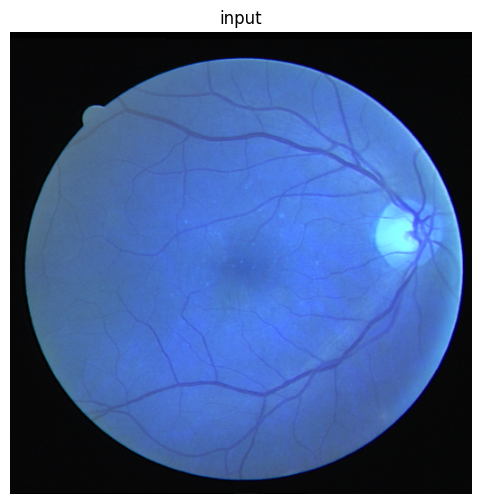

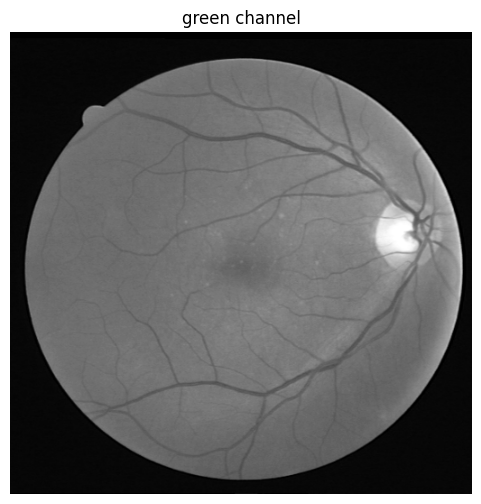

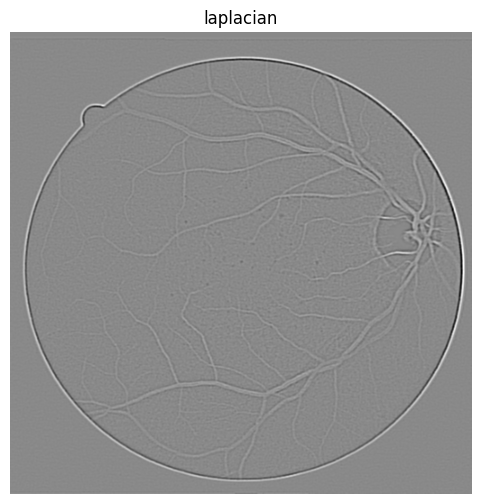

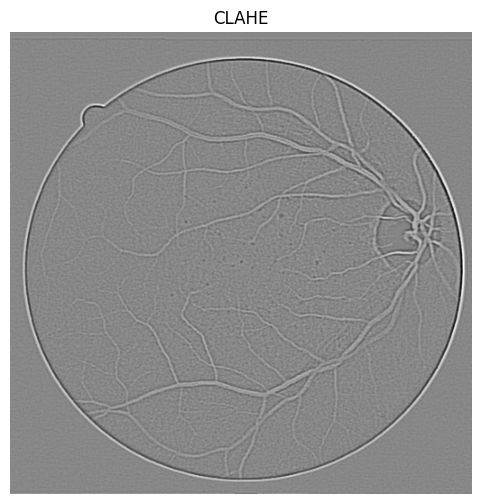

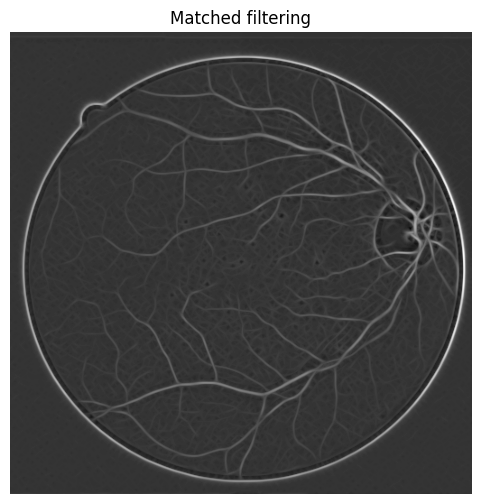

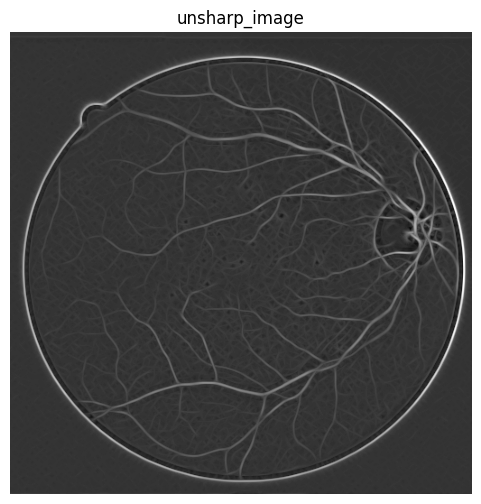

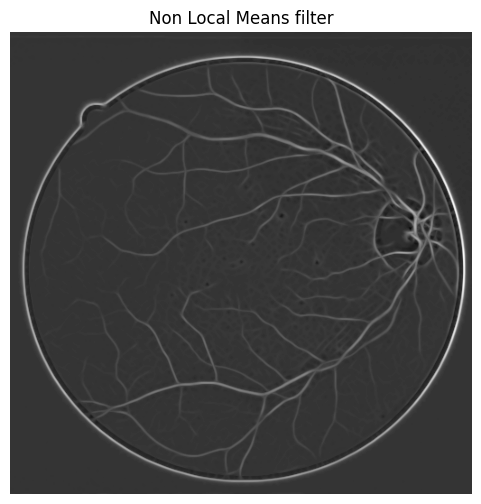

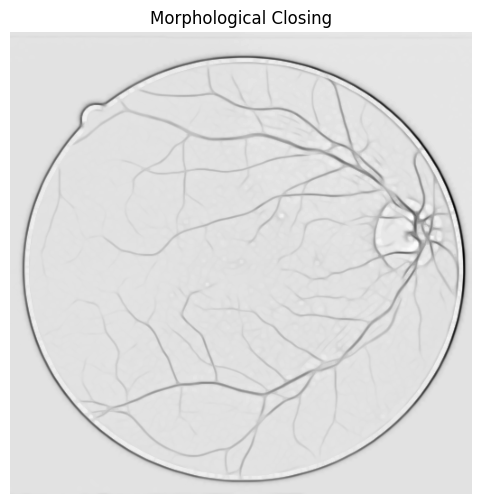

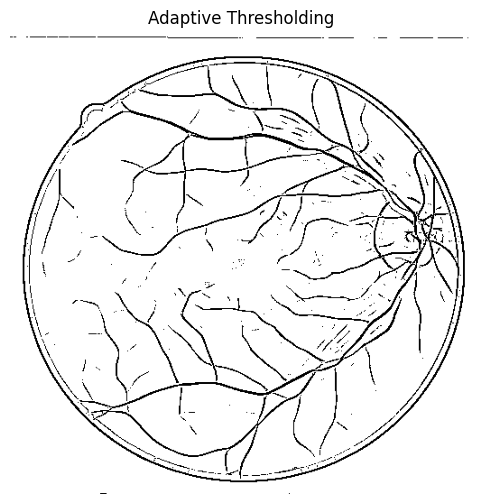

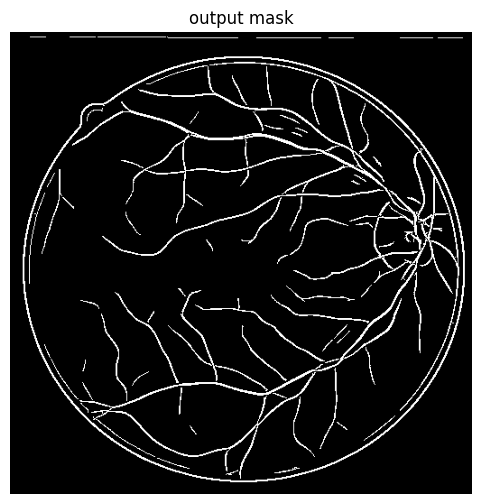

In [38]:
image = cv2.imread(IMAGE_PATH)
plot_image(image,"input")
green_channel = image[:, :, 1]
plot_image(green_channel,"green channel")
log_image = cv2.Laplacian(green_channel, cv2.CV_64F,ksize=5)
log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))
plot_image(log_image,"laplacian")

clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2, 2))
clahe=clahe.apply(log_image)

plot_image(clahe,"CLAHE")
#matched=cv2.normalize(clahe, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
matched=matched_filter(clahe,num_angles=10,wavelengths=[10],gammas=[0.5,1,2])
matched = cv2.normalize(matched, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
plot_image(matched,"Matched filtering")
blurred = cv2.GaussianBlur(matched, (3, 3), 5.0)
unsharp_image = cv2.addWeighted(matched, 1.5, blurred, -0.5, 0)
plot_image(unsharp_image,"unsharp_image")
non_local_means_filtered = cv2.fastNlMeansDenoising(matched, None, h=3, templateWindowSize=3, searchWindowSize=50)
plot_image(non_local_means_filtered,"Non Local Means filter")
kernel = np.ones((3, 3), np.uint8)  
closed_image = cv2.morphologyEx(non_local_means_filtered, cv2.MORPH_CLOSE, kernel)
closed_image=cv2.bitwise_not(closed_image)
plot_image(closed_image,"Morphological Closing")
adaptive_thresh_mean = cv2.adaptiveThreshold(
    closed_image, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    3, 
    2  
)
plot_image(adaptive_thresh_mean,"Adaptive Thresholding")
inverted=cv2.bitwise_not(adaptive_thresh_mean)
num_labels, labels_im = cv2.connectedComponents(inverted)
output_image = np.zeros_like(inverted)
min_size = 15
for label in range(1, num_labels):  
    component_size = np.sum(labels_im == label)
    if component_size >= min_size:
        output_image[labels_im == label] = 255 
plot_image(output_image,"output mask")

In [56]:
def gray_level_slicing(image, lower_bound, upper_bound):
    """
    Perform gray level slicing on an image.

    Parameters:
        image (ndarray): Input grayscale image as a NumPy array.
        lower_bound (int): Lower bound of gray levels to be highlighted.
        upper_bound (int): Upper bound of gray levels to be highlighted.

    Returns:
        sliced_image (ndarray): Gray level sliced image.
    """
    # Ensure the image is in grayscale
    if len(image.shape) != 2:
        raise ValueError("Input image must be grayscale.")

    # Create a mask for the specified gray level range
    mask = (image >= lower_bound) & (image <= upper_bound)

    # Create a new image initialized to zeros
    sliced_image = np.zeros_like(image)

    # Set the pixels in the specified range to white (255)
    sliced_image[mask] = 255

    return sliced_image

# Example usage

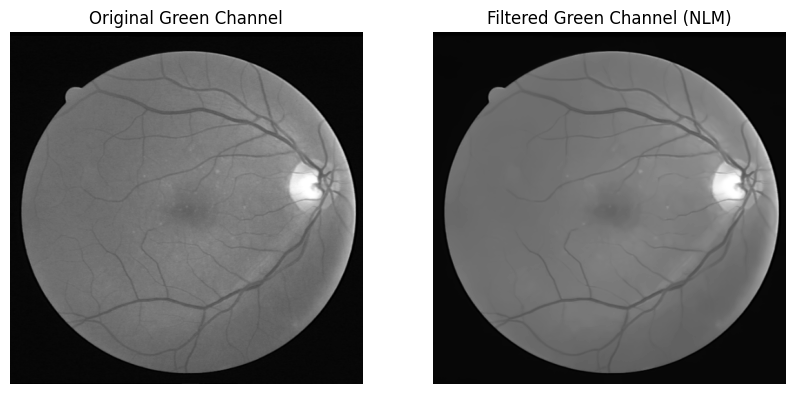

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(IMAGE_PATH)
def green_channel_comparison(image):
    """
    Extracts the green channel from an image and applies a Non-Local Means filter on it.
    Compares the original green channel with the filtered version.

    Parameters:
        image (ndarray): Input color image as a NumPy array (BGR format).

    Returns:
        green_channel (ndarray): Original green channel image.
        filtered_green (ndarray): Green channel after Non-Local Means filter.
    """
    # Ensure the image is in color
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input image must be a color image in BGR format.")

    # Extract the green channel
    green_channel = image[:, :, 1]

    # Apply Non-Local Means Denoising on the green channel
    filtered_green = cv2.fastNlMeansDenoising(green_channel, None, h=3, templateWindowSize=7, searchWindowSize=21)

    # Display the original green channel and the filtered version
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Green Channel")
    plt.imshow(green_channel, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Filtered Green Channel (NLM)")
    plt.imshow(filtered_green, cmap='gray')
    plt.axis('off')

    plt.show()

    return green_channel, filtered_green

# Example usage
if __name__ == "__main__":
    # Load an image
    # Perform green channel comparison
    green_channel, filtered_green = green_channel_comparison(image)


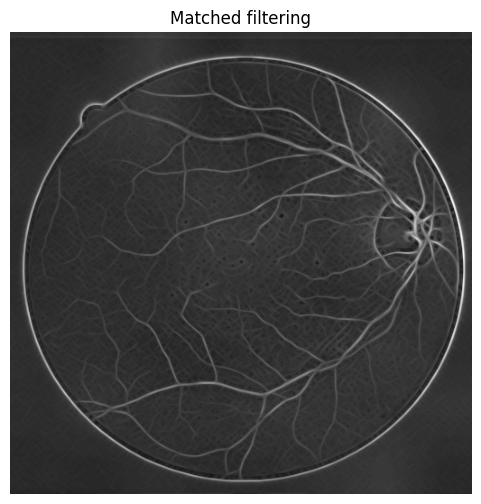

'\nhuh=2*green_channel-log_image\nplot_image(huh,"sharpened")\nhuh=apply_clahe(huh)\nplot_image(huh,"sharpened")\n#huh=cv2.bitwise_not(huh)\nhuh=matched_filter(huh)\n\nplot_image(huh,"matched filtering")\nhuh=cv2.normalize(huh, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)\nhuh=cv2.fastNlMeansDenoising(huh, None, h=3, templateWindowSize=3, searchWindowSize=50)\nhuh = cv2.morphologyEx(huh, cv2.MORPH_CLOSE, kernel)\nhuh=cv2.bitwise_not(huh)\nplot_image(huh,"morphological closing")\nplot_image(huh,"green")\n'

In [93]:
image = cv2.imread(IMAGE_PATH)
green_channel = image[:, :, 1]
#plot_image(green_channel,"without noise reduction")

#plot_histogram(green_channel,"without noise reduction")

#green_channel=cv2.fastNlMeansDenoising(green_channel, None, h=3, templateWindowSize=3, searchWindowSize=21)


#plot_image(green_channel,"with noise reduction")
#plot_histogram(green_channel,"with noise reduction")
log_image = cv2.Laplacian(green_channel, cv2.CV_64F)
log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))
#plot_image(log_image,"Laplacian")
clahe=apply_clahe(log_image)
#plot_image(clahe,"CLAHE")

matched=matched_filter(clahe,num_angles=10,wavelengths=[10],gammas=[0.5,1,2])
matched = cv2.normalize(matched, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
plot_image(matched,"Matched filtering")
#noise(unsharp_image)
#plot_image(matched,"gust")

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#clahe_matched=clahe.apply(matched)
notlap=cv2.bitwise_not(log_image)
#plot_image(notlap,"sun")
notlap1=cv2.equalizeHist(log_image)
notlap1=matched_filter(notlap,num_angles=10,wavelengths=[5,10],gammas=[0.5,1,2])
notlap=apply_clahe(log_image)
notlap=matched_filter(notlap,num_angles=10,wavelengths=[10],gammas=[0.5,1,2])
notlap=cv2.normalize(notlap, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
notlap=cv2.fastNlMeansDenoising(notlap, None, h=3, templateWindowSize=3, searchWindowSize=50)
'''
huh=2*green_channel-log_image
plot_image(huh,"sharpened")
huh=apply_clahe(huh)
plot_image(huh,"sharpened")
#huh=cv2.bitwise_not(huh)
huh=matched_filter(huh)

plot_image(huh,"matched filtering")
huh=cv2.normalize(huh, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
huh=cv2.fastNlMeansDenoising(huh, None, h=3, templateWindowSize=3, searchWindowSize=50)
huh = cv2.morphologyEx(huh, cv2.MORPH_CLOSE, kernel)
huh=cv2.bitwise_not(huh)
plot_image(huh,"morphological closing")
plot_image(huh,"green")
'''
#plot_image(notlap1,"sun")
#plot_image(notlap,"sun")

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_psnr(original, filtered):
        mse = np.mean((original - filtered) ** 2)
        if mse == 0:
            return 100  # PSNR is infinite for identical images
        max_i = 255.0
        psnr = 10 * np.log10((max_i ** 2) / mse)
        return psnr


def calculate_cii(original, processed):
    original_mean = np.mean(original)
    processed_mean = np.mean(processed)
    return (processed_mean - original_mean) / original_mean  # Contrast Improvement Index

def find_best_parameters_and_plot(matched):
    best_psnr = -1
    best_parameters = None

    # Parameter ranges
    kernel_sizes = [(3,3),(5, 5), (7, 7), (9, 9)]
    sigmas = np.arange(3,15,0.5)  # Vary sigma values for Gaussian blur
    alphas = np.arange(1.0, 2.1, 0.1)
    betas = np.arange(-0.1, -3.1, -0.1)

    

    for ksize in kernel_sizes:
        for sigma in sigmas:
            sigma=round(sigma,2)
            for alpha in alphas:
                alpha=round(alpha,2)
                for beta in betas:
                    # Apply Gaussian Blur
                    blurred = cv2.GaussianBlur(matched, ksize, sigma)
                    beta=round(beta,2)
                    
                    # Apply Unsharp Masking
                    unsharp_image = cv2.addWeighted(matched, alpha, blurred, beta, 0)

                    # Calculate PSNR and CII
                    psnr_value = calculate_psnr(matched, unsharp_image)
                    cii_value = calculate_cii(matched, unsharp_image)

                    # Check if this is the best PSNR
                    if psnr_value > best_psnr:
                        best_psnr = psnr_value
                        best_parameters = (ksize, sigma, alpha, beta, cii_value)
                    #print(ksize,sigma,alpha,beta)
                    # Plot the image after 4 iterations for each kernel
                    #if alpha == 1.5 : # Adjust as needed to select images to plot
                     #   plot_image(unsharp_image,"l")

    
    return best_parameters

# Load the original image


# Find the best parameters and plot images
best_params = find_best_parameters_and_plot(matched)

# Print the best parameters
print("Best Parameters:")
print(f"Kernel Size: {best_params[0]}")
print(f"Sigma: {best_params[1]}")
print(f"Alpha: {best_params[2]}")
print(f"Beta: {best_params[3]}")
print(f"Best PSNR: {best_params[4]:.2f}")


KeyboardInterrupt: 

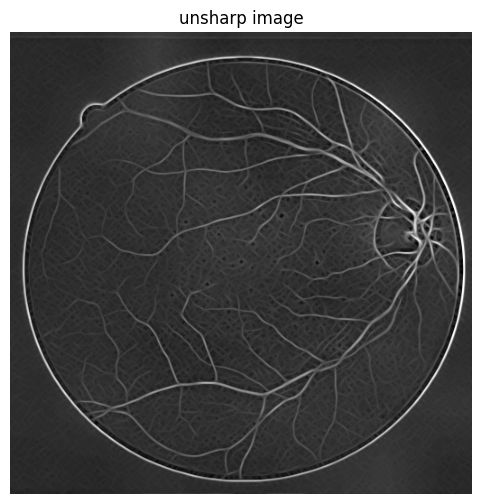

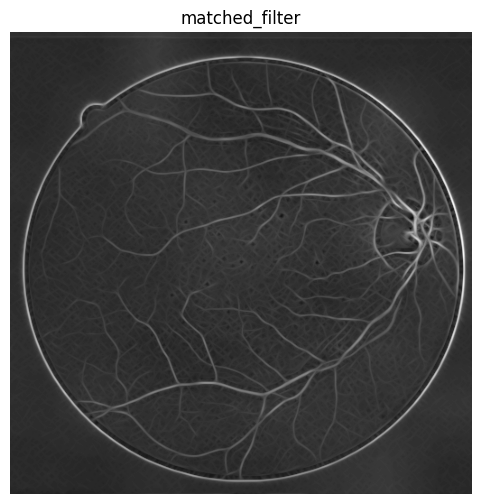

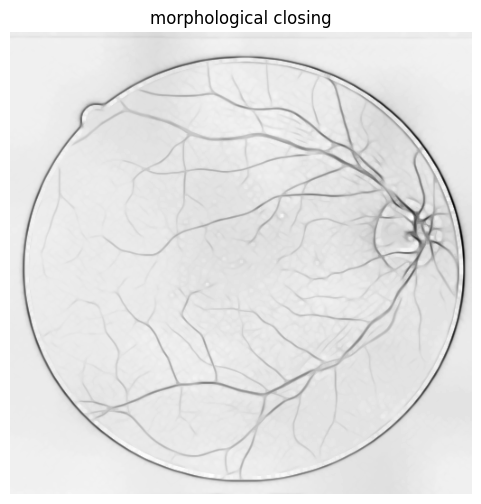

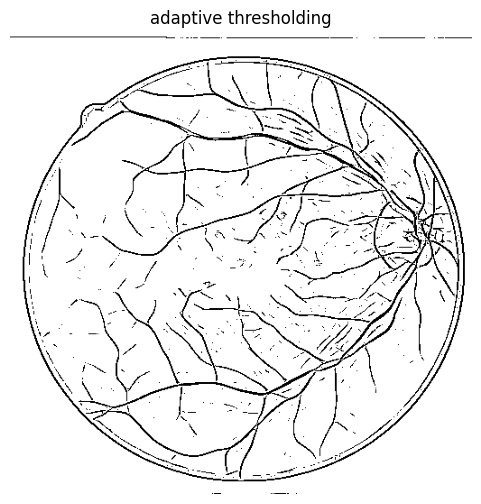

'\nkernel = np.ones((3, 3), np.uint8)\ncleaned = cv2.morphologyEx(adaptive_thresh_mean, cv2.MORPH_OPEN, kernel)\n# Find connected components\nnum_labels, labels_im = cv2.connectedComponents(cleaned)\n\n# Create an output image to hold the filtered components\noutput = np.zeros_like(image)\n\n# Define the minimum size of components to keep\nmin_size = 100  # Adjust this value as needed\n\n# Loop through the components\nfor label in range(1, num_labels):  # Start from 1 to skip the background\n    component = (labels_im == label).astype(np.uint8)\n    size = np.sum(component)\n\n    if size >= min_size:\n        output[component == 1] = 255 \nplot_image(cleaned,"cleaned")'

In [97]:
#plot_image(matched,"matched")
#calc(clahe,matched,"matched")
#show_enhancement(matched)

blurred = cv2.GaussianBlur(matched, (7, 7), 10.0)
unsharp_image = cv2.addWeighted(matched, 1.5, blurred, -0.5, 0)
plot_image(unsharp_image,"unsharp image")
plot_image(matched,"matched_filter")
#calc(unsharp_image,matched,"unsharp_image")
non_local_means_filtered = cv2.fastNlMeansDenoising(matched, None, h=3, templateWindowSize=3, searchWindowSize=50)
#
#(green_channel, non_local_means_filtered, 'Non-Local Means Filter')
#noise(unsharp_image)
#plot_image(unsharp_image,"unnsharp")
#plot_image(matched,"MATHCED")
#plot_image(non_local_means_filtered,"og")

kernel = np.ones((3, 3), np.uint8)  # You can adjust the kernel size based on your needs

# Apply morphological closing
closed_image = cv2.morphologyEx(non_local_means_filtered, cv2.MORPH_CLOSE, kernel)
closed_image=cv2.bitwise_not(closed_image)
plot_image(closed_image,"morphological closing")
#plot_histogram(closed_image)

equalized = cv2.equalizeHist(closed_image)
#plot_image(equalized,"eq")
adaptive_thresh_mean = cv2.adaptiveThreshold(
    closed_image, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    3,  # Block size (must be odd)
    2    # Constant subtracted from the mean
)
plot_image(adaptive_thresh_mean,"adaptive thresholding")
'''
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(adaptive_thresh_mean, cv2.MORPH_OPEN, kernel)
# Find connected components
num_labels, labels_im = cv2.connectedComponents(cleaned)

# Create an output image to hold the filtered components
output = np.zeros_like(image)

# Define the minimum size of components to keep
min_size = 100  # Adjust this value as needed

# Loop through the components
for label in range(1, num_labels):  # Start from 1 to skip the background
    component = (labels_im == label).astype(np.uint8)
    size = np.sum(component)

    if size >= min_size:
        output[component == 1] = 255 
plot_image(cleaned,"cleaned")'''

In [7]:
import os
import cv2  # For image loading and processing
import matplotlib.pyplot as plt

# Define your image processing function (example: converting to grayscale)
def process_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return None
    #plot_image(image,"input")
    green_channel = image[:, :, 1]
    #plot_image(green_channel,"green channel")
    log_image = cv2.Laplacian(green_channel, cv2.CV_64F)
    log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))
    #plot_image(log_image,"laplacian")
    clahe=apply_clahe(log_image)
    #plot_image(clahe,"CLAHE")
    matched=matched_filter(clahe,num_angles=10,wavelengths=[10],gammas=[0.5,1,2])
    matched = cv2.normalize(matched, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    #plot_image(matched,"Matched filtering")
    blurred = cv2.GaussianBlur(matched, (7, 7), 10.0)
    unsharp_image = cv2.addWeighted(matched, 1.5, blurred, -0.5, 0)
    #plot_image(unsharp_image,"unsharp_image")
    non_local_means_filtered = cv2.fastNlMeansDenoising(matched, None, h=3, templateWindowSize=3, searchWindowSize=50)
    #plot_image(non_local_means_filtered,"Non Local Means filter")
    kernel = np.ones((3, 3), np.uint8)  
    closed_image = cv2.morphologyEx(non_local_means_filtered, cv2.MORPH_CLOSE, kernel)
    closed_image=cv2.bitwise_not(closed_image)
    #plot_image(closed_image,"Morphological Closing")
    adaptive_thresh_mean = cv2.adaptiveThreshold(
        closed_image, 
        255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 
        3, 
        2  
    )
    #plot_image(adaptive_thresh_mean,"Adaptive Thresholding")
    inverted=cv2.bitwise_not(adaptive_thresh_mean)
    num_labels, labels_im = cv2.connectedComponents(inverted)
    output_image = np.zeros_like(inverted)
    min_size = 15
    for label in range(1, num_labels):  
        component_size = np.sum(labels_im == label)
        if component_size >= min_size:
            output_image[labels_im == label] = 255 
    #plot_image(output_image,"output image(after connected component analysis)")
    return output_image

# Define the directory containing your images
image_directory = r"C:\projects\ip\Data\train\image"  # Replace with your directory path


inverted=closed_image
plot_histogram(inverted)
plot_image(inverted,"inverted matched")
image = inverted.astype(np.uint8)
binary_image = cv2.adaptiveThreshold(
    image, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11,  # Block size (must be odd)
    2    # Constant subtracted from the mean
)
plot_image(binary_image,"ninar")

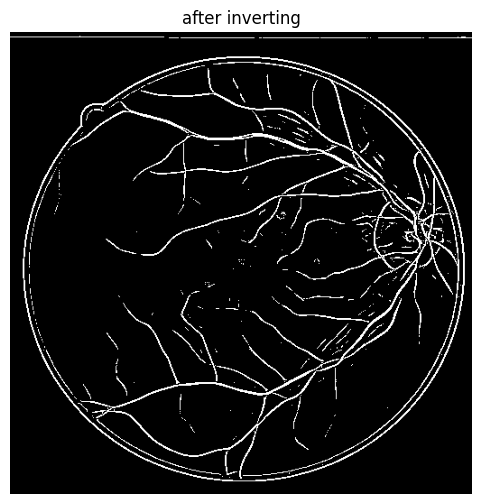

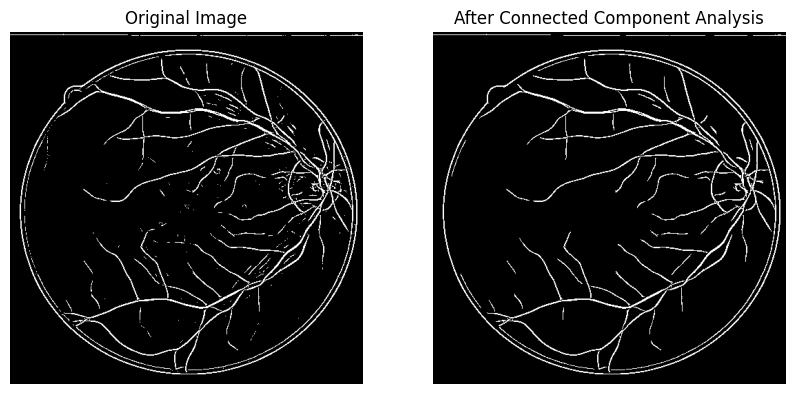

In [47]:
inverted=cv2.bitwise_not(adaptive_thresh_mean)
plot_image(inverted,"after inverting")
num_labels, labels_im = cv2.connectedComponents(inverted)

# Step 2: Initialize an output image for the filtered components
output_image = np.zeros_like(inverted)

# Step 3: Filter components by size
min_size = 20# Set the minimum size threshold for connected components
for label in range(1, num_labels):  # Skip label 0 (background)
    component_size = np.sum(labels_im == label)
    if component_size >= min_size:
        output_image[labels_im == label] = 255 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(inverted, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('After Connected Component Analysis')
plt.axis('off')

plt.show()

In [117]:
import os
import cv2
import numpy as np

def process_image(image_path):
    """
    Processes a single image according to the provided pipeline.
    """
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return None

    # Extract the green channel
    green_channel = image[:, :, 1]

    # Apply Laplacian filter (edge detection)
    log_image = cv2.Laplacian(green_channel, cv2.CV_64F)
    log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = apply_clahe(log_image)

    # Apply matched filter
    matched = matched_filter(clahe, num_angles=10, wavelengths=[10], gammas=[0.5, 1, 2])
    matched = cv2.normalize(matched, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Apply Gaussian blur and unsharp masking
    blurred = cv2.GaussianBlur(matched, (7, 7), 10.0)
    unsharp_image = cv2.addWeighted(matched, 1.5, blurred, -0.5, 0)

    # Apply Non-Local Means Denoising
    non_local_means_filtered = cv2.fastNlMeansDenoising(matched, None, h=3, templateWindowSize=3, searchWindowSize=50)

    # Morphological closing
    kernel = np.ones((3, 3), np.uint8)
    closed_image = cv2.morphologyEx(non_local_means_filtered, cv2.MORPH_CLOSE, kernel)
    closed_image = cv2.bitwise_not(closed_image)

    # Adaptive thresholding
    adaptive_thresh_mean = cv2.adaptiveThreshold(
        closed_image, 
        255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 
        3, 
        2
    )

    # Invert the image
    inverted = cv2.bitwise_not(adaptive_thresh_mean)

    # Connected components for labeling
    num_labels, labels_im = cv2.connectedComponents(inverted)
    output_image = np.zeros_like(inverted)
    
    # Filter components based on size
    min_size = 15
    for label in range(1, num_labels):  
        component_size = np.sum(labels_im == label)
        if component_size >= min_size:
            output_image[labels_im == label] = 255

    return output_image

def process_and_save_images(input_dir, output_dir):
    """
    Processes images from input_dir and saves them in output_dir with the same filenames.
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List all image files in the input directory
    image_files = [f for f in os.listdir(input_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

    for image_file in image_files:
        # Full path to the input image
        input_image_path = os.path.join(input_dir, image_file)

        # Process the image
        processed_image = process_image(input_image_path)
        if processed_image is None:
            continue

        # Full path to the output image
        output_image_path = os.path.join(output_dir, image_file)

        # Save the processed image in the output directory
        cv2.imwrite(output_image_path, processed_image)
        print(f"Processed and saved: {output_image_path}")

# Example usage
input_directory = r"C:\projects\ip\Data\train\image"   # Replace with the path to your input directory
output_directory = r"C:\projects\ip\Data\train\processed_mask" # Replace with the path to your output directory

process_and_save_images(input_directory, output_directory)


Processed and saved: C:\projects\ip\Data\train\processed_mask\0.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\1.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\10.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\11.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\12.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\13.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\14.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\15.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\16.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\17.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\18.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\19.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\2.png
Processed and saved: C:\projects\ip\Data\train\processed_mask\20.png
Processed and saved: C:\projects\ip\D

In [120]:
import cv2
import numpy as np
import os

# Function to calculate IoU (Intersection over Union)
def calculate_iou(predicted_mask, actual_mask):
    intersection = np.logical_and(predicted_mask, actual_mask)
    union = np.logical_or(predicted_mask, actual_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Function to calculate Dice Coefficient
def calculate_dice(predicted_mask, actual_mask):
    intersection = np.logical_and(predicted_mask, actual_mask)
    dice = (2 * np.sum(intersection)) / (np.sum(predicted_mask) + np.sum(actual_mask))
    return dice

# Function to calculate Precision
def calculate_precision(predicted_mask, actual_mask):
    tp = np.sum(np.logical_and(predicted_mask == 1, actual_mask == 1))  # True Positives
    fp = np.sum(np.logical_and(predicted_mask == 1, actual_mask == 0))  # False Positives
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    return precision

# Function to calculate Recall
def calculate_recall(predicted_mask, actual_mask):
    tp = np.sum(np.logical_and(predicted_mask == 1, actual_mask == 1))  # True Positives
    fn = np.sum(np.logical_and(predicted_mask == 0, actual_mask == 1))  # False Negatives
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    return recall

# Function to calculate Accuracy
def calculate_accuracy(predicted_mask, actual_mask):
    correct = np.sum(predicted_mask == actual_mask)
    total = predicted_mask.size
    accuracy = correct / total
    return accuracy

# Function to load masks, compare, and calculate metrics
def evaluate_masks(predicted_folder, actual_folder):
    ious, dices, precisions, recalls, accuracies = [], [], [], [], []
    
    # Iterate through each mask in the folder
    for filename in os.listdir(predicted_folder):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Load predicted and actual masks
            predicted_mask_path = os.path.join(predicted_folder, filename)
            actual_mask_path = os.path.join(actual_folder, filename)
            
            predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)
            actual_mask = cv2.imread(actual_mask_path, cv2.IMREAD_GRAYSCALE)
            
            # Threshold masks to binary (if they aren't already binary)
            _, predicted_mask = cv2.threshold(predicted_mask, 127, 1, cv2.THRESH_BINARY)
            _, actual_mask = cv2.threshold(actual_mask, 127, 1, cv2.THRESH_BINARY)

            # Calculate metrics
            iou = calculate_iou(predicted_mask, actual_mask)
            dice = calculate_dice(predicted_mask, actual_mask)
            precision = calculate_precision(predicted_mask, actual_mask)
            recall = calculate_recall(predicted_mask, actual_mask)
            accuracy = calculate_accuracy(predicted_mask, actual_mask)
            
            # Append metrics to lists
            ious.append(iou)
            dices.append(dice)
            precisions.append(precision)
            recalls.append(recall)
            accuracies.append(accuracy)
            
            print(f"{filename} - IoU: {iou:.4f}, Dice: {dice:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

    # Calculate average metrics
    print("\nAverage Performance Metrics:")
    print(f"Average IoU: {np.mean(ious):.4f}")
    print(f"Average Dice Coefficient: {np.mean(dices):.4f}")
    print(f"Average Precision: {np.mean(precisions):.4f}")
    print(f"Average Recall: {np.mean(recalls):.4f}")
    print(f"Average Accuracy: {np.mean(accuracies):.4f}")

# Define folder paths
predicted_folder = r"C:\projects\ip\Data\train\image"# Folder with predicted masks
actual_folder = r"C:\projects\ip\Data\train\processed_mask"# Folder with actual masks

# Run evaluation
evaluate_masks(predicted_folder, actual_folder)


0.png - IoU: 0.0603, Dice: 0.1138, Precision: 0.0652, Recall: 0.4462, Accuracy: 0.5528
1.png - IoU: 0.0605, Dice: 0.1140, Precision: 0.0654, Recall: 0.4459, Accuracy: 0.5528
10.png - IoU: 0.1009, Dice: 0.1832, Precision: 0.1044, Recall: 0.7483, Accuracy: 0.4269
11.png - IoU: 0.0862, Dice: 0.1588, Precision: 0.0897, Recall: 0.6895, Accuracy: 0.3624
12.png - IoU: 0.0767, Dice: 0.1425, Precision: 0.0801, Recall: 0.6475, Accuracy: 0.4000
13.png - IoU: 0.0770, Dice: 0.1430, Precision: 0.0803, Recall: 0.6488, Accuracy: 0.4002
14.png - IoU: 0.0768, Dice: 0.1427, Precision: 0.0802, Recall: 0.6481, Accuracy: 0.4001
15.png - IoU: 0.0796, Dice: 0.1475, Precision: 0.0830, Recall: 0.6610, Accuracy: 0.4017
16.png - IoU: 0.0291, Dice: 0.0566, Precision: 0.0915, Recall: 0.0409, Accuracy: 0.9194
17.png - IoU: 0.0293, Dice: 0.0569, Precision: 0.0918, Recall: 0.0412, Accuracy: 0.9195
18.png - IoU: 0.0295, Dice: 0.0572, Precision: 0.0927, Recall: 0.0414, Accuracy: 0.9193
19.png - IoU: 0.0292, Dice: 0.0568

(-0.5, 511.5, 511.5, -0.5)

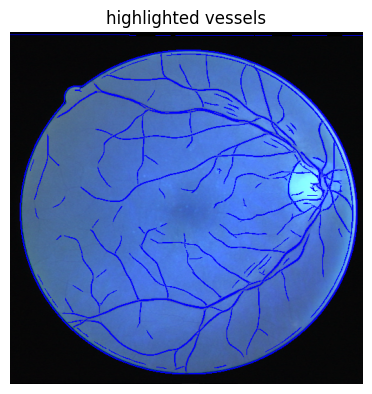

In [13]:
def apply_mask_with_red(image_path, mask):
    """
    Applies the given binary mask on the image and colors the masked regions in red.
    """
    # Load the original image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return None
    
    # Ensure the mask is binary (values 0 or 255)
    mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)[1]

    # Create a red color overlay on the image where the mask is 255
    # Red in BGR is (0, 0, 255)
    image[mask == 255] = [0, 0, 255]

    return image
oyt=apply_mask_with_red(IMAGE_PATH,output_image)
result_image_rgb = cv2.cvtColor(oyt, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(oyt, cmap='gray')
plt.title('highlighted vessels')
plt.axis('off')

Best Kernel Size: 5, Best PSNR: 10.31857318494575


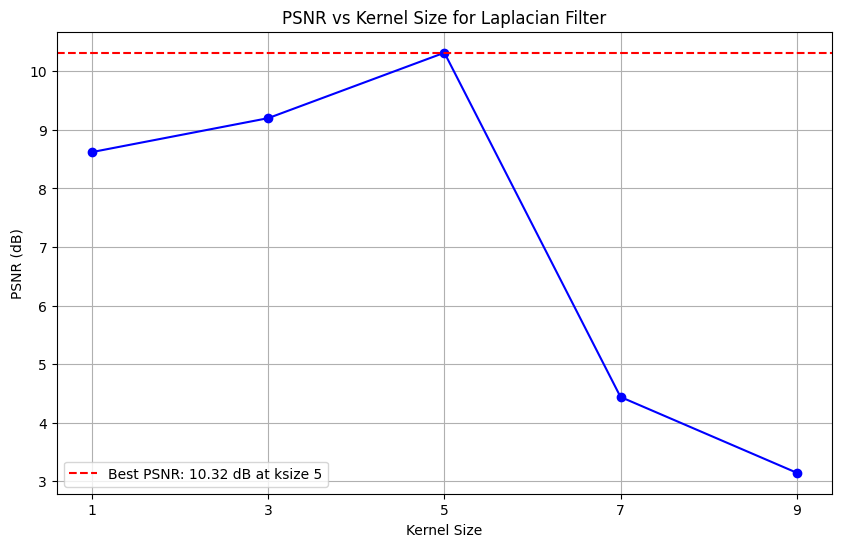

In [15]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def find_best_laplacian_params(original_image, kernel_sizes):
    best_psnr = -float('inf')
    best_kernel_size = None
    best_filtered_image = None
    psnr_values = []

    for ksize in kernel_sizes:
        # Apply the Laplacian filter
        laplacian = cv2.Laplacian(original_image, cv2.CV_64F, ksize=ksize)
        # Convert back to the original scale
        filtered_image = cv2.convertScaleAbs(laplacian)

        # Calculate PSNR
        current_psnr = psnr(original_image, filtered_image)
        psnr_values.append(current_psnr)

        # Update the best PSNR and corresponding parameters
        if current_psnr > best_psnr:
            best_psnr = current_psnr
            best_kernel_size = ksize
            best_filtered_image = filtered_image

    return best_kernel_size, best_psnr, best_filtered_image, psnr_values

# Example usage with an image as input
# Load your image as a NumPy array (for example, using OpenCV)
image_path = 'path_to_your_image.jpg'  # Replace with your image path
original_image = green_channel

kernel_sizes = [1, 3, 5, 7, 9]  # Different kernel sizes to test
best_ksize, best_psnr, filtered_image, psnr_values = find_best_laplacian_params(original_image, kernel_sizes)

print(f"Best Kernel Size: {best_ksize}, Best PSNR: {best_psnr}")

# Plotting PSNR vs Kernel Size
plt.figure(figsize=(10, 6))
plt.plot(kernel_sizes, psnr_values, marker='o', linestyle='-', color='b')
plt.title('PSNR vs Kernel Size for Laplacian Filter')
plt.xlabel('Kernel Size')
plt.ylabel('PSNR (dB)')
plt.xticks(kernel_sizes)  # Set x-ticks to kernel sizes
plt.grid()
plt.axhline(y=best_psnr, color='r', linestyle='--', label=f'Best PSNR: {best_psnr:.2f} dB at ksize {best_ksize}')
plt.legend()
plt.show()

# Show the filtered image
cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Best Clip Limit: 1, Best Tile Size: 2, Best PSNR: 34.004505487898115


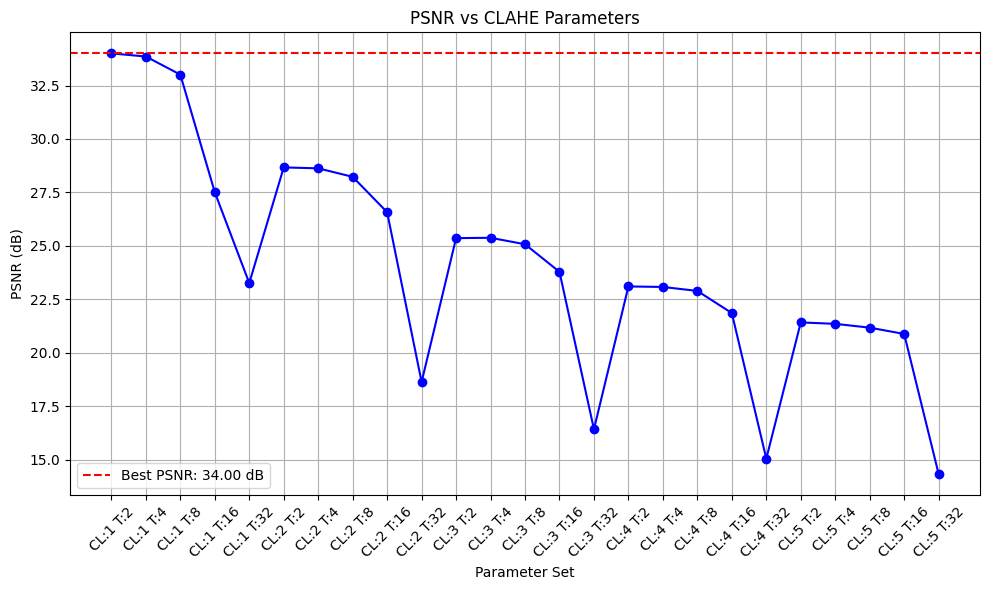

In [17]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def find_best_clahe_params(original_image, clip_limits, tile_sizes):
    best_psnr = -float('inf')
    best_clip_limit = None
    best_tile_size = None
    psnr_values = []

    for clip_limit in clip_limits:
        for tile_size in tile_sizes:
            # Create a CLAHE object
            clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size, tile_size))
            # Apply CLAHE to the original image
            clahe_image = clahe.apply(original_image)

            # Calculate PSNR
            current_psnr = psnr(original_image, clahe_image)
            psnr_values.append(current_psnr)

            # Update the best PSNR and corresponding parameters
            if current_psnr > best_psnr:
                best_psnr = current_psnr
                best_clip_limit = clip_limit
                best_tile_size = tile_size
                best_clahe_image = clahe_image

    return best_clip_limit, best_tile_size, best_psnr, best_clahe_image, psnr_values

# Example usage with an image as input
# Load your image as a NumPy array (for example, using OpenCV)
image_path = 'path_to_your_image.jpg'  # Replace with your image path
original_image = log_image

clip_limits = [1, 2, 3, 4, 5]  # Different clip limits to test
tile_sizes = [2,4,8, 16, 32]  # Different tile grid sizes to test

best_clip_limit, best_tile_size, best_psnr, clahe_image, psnr_values = find_best_clahe_params(original_image, clip_limits, tile_sizes)

print(f"Best Clip Limit: {best_clip_limit}, Best Tile Size: {best_tile_size}, Best PSNR: {best_psnr}")

# Plotting PSNR vs Parameters
plt.figure(figsize=(10, 6))
plt.plot(range(len(psnr_values)), psnr_values, marker='o', linestyle='-', color='b')
plt.title('PSNR vs CLAHE Parameters')
plt.xlabel('Parameter Set')
plt.ylabel('PSNR (dB)')
plt.xticks(range(len(psnr_values)), [f'CL:{cl} T:{ts}' for cl in clip_limits for ts in tile_sizes], rotation=45)
plt.grid()
plt.axhline(y=best_psnr, color='r', linestyle='--', label=f'Best PSNR: {best_psnr:.2f} dB')
plt.legend()
plt.tight_layout()
plt.show()

# Show the CLAHE image
cv2.imshow('CLAHE Image', clahe_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\thooy\AppData\Local\Temp\ipykernel_35732\2528080985.py:24: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  current_psnr = psnr(original_image, filtered_image)


Best Parameters: Kernel Size: 15, Theta: 1.5707963267948966, Wavelength: 10, Gamma: 1
Best PSNR: -13.607793672764423


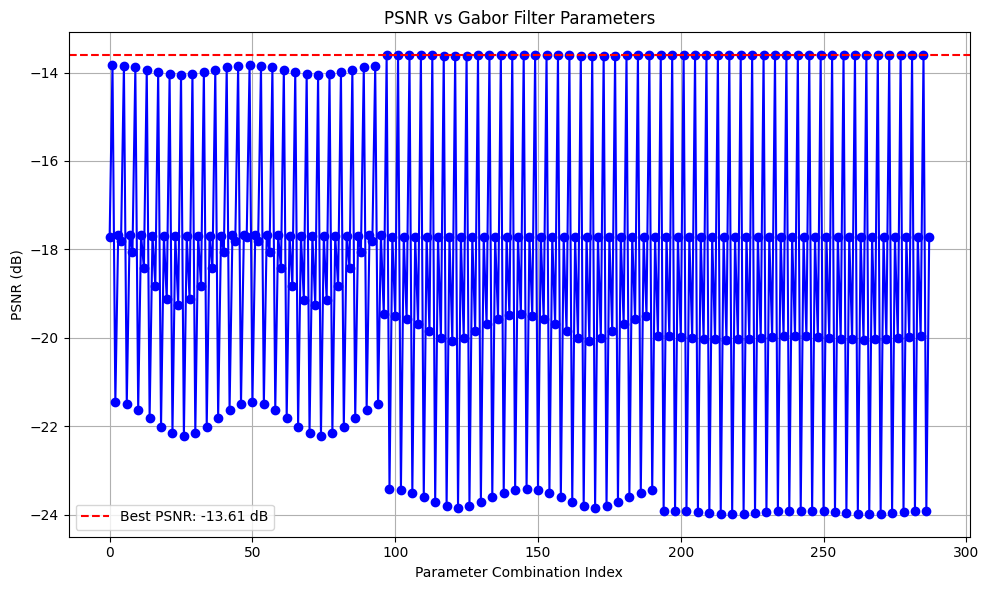

In [22]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def matched_filter(image, original_image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24, wavelengths=[10, 15], gammas=[0.5, 1]):
    best_psnr = -float('inf')
    best_params = None
    psnr_values = []
    filtered_images = []

    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            for wavelength in wavelengths:
                for gamma in gammas:
                    # Create the Gabor kernel
                    kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, wavelength, gamma, 0, ktype=cv2.CV_32F)
                    # Apply the filter to the image
                    filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)

                    # Calculate PSNR
                    current_psnr = psnr(original_image, filtered_image)
                    psnr_values.append(current_psnr)
                    filtered_images.append(filtered_image)

                    # Update the best PSNR and corresponding parameters
                    if current_psnr > best_psnr:
                        best_psnr = current_psnr
                        best_params = (kernel_size, theta, wavelength, gamma)
                        best_filtered_image = filtered_image

    return best_params, best_psnr, best_filtered_image, psnr_values

# Example usage
image_path = 'path_to_your_image.jpg'  # Replace with your image path
original_image = clahe

# Set parameters for Gabor filter optimization
kernel_sizes = [9, 15, 21]
wavelengths = [10, 15]
gammas = [0.5, 1]

best_params, best_psnr, best_filtered_image, psnr_values = matched_filter(original_image, original_image, kernel_sizes, num_angles=24, wavelengths=wavelengths, gammas=gammas)

print(f"Best Parameters: Kernel Size: {best_params[0]}, Theta: {best_params[1]}, Wavelength: {best_params[2]}, Gamma: {best_params[3]}")
print(f"Best PSNR: {best_psnr}")

# Plotting PSNR vs Parameters
plt.figure(figsize=(10, 6))
plt.plot(psnr_values, marker='o', linestyle='-', color='b')
plt.title('PSNR vs Gabor Filter Parameters')
plt.xlabel('Parameter Combination Index')
plt.ylabel('PSNR (dB)')
plt.axhline(y=best_psnr, color='r', linestyle='--', label=f'Best PSNR: {best_psnr:.2f} dB')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Show the filtered image
cv2.imshow('Best Filtered Image', best_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Optimal Kernel Size: (3, 3), Optimal Sigma: 5.0, PSNR: 40.89 dB


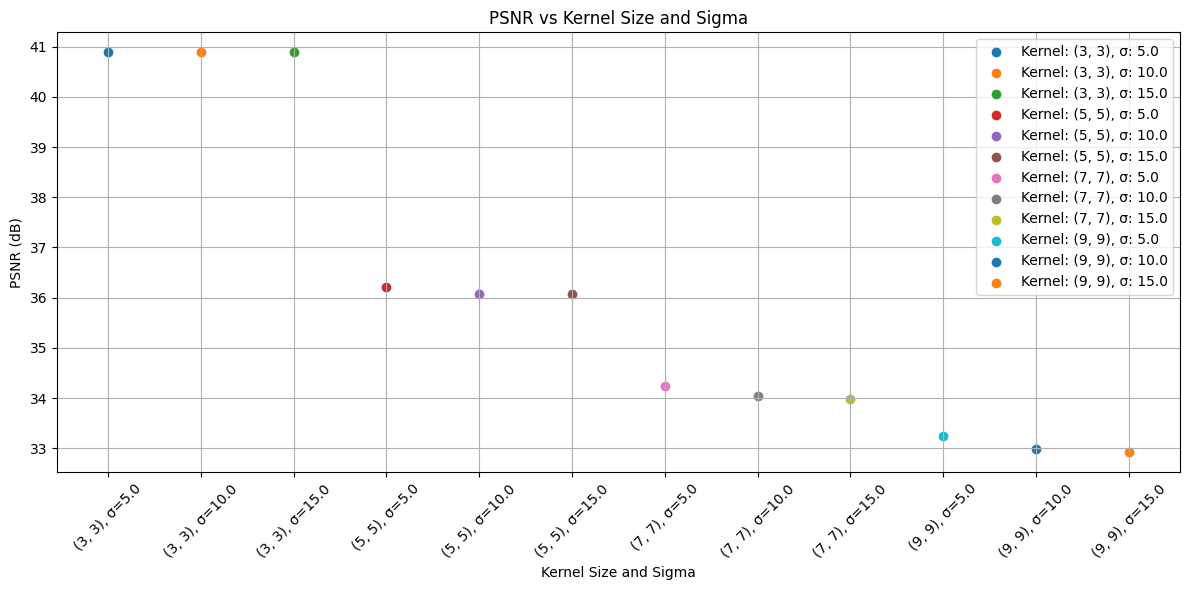

In [28]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
from itertools import product

def unsharp_mask(image, kernel_size=(7, 7), sigma=10.0, alpha=1.5, beta=-0.5):
    if image.dtype != np.uint8:
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    
    # Add the original image and the blurred image together
    unsharp_image = cv2.addWeighted(image, alpha, blurred, beta, 0)

    return unsharp_image

def optimize_unsharp_mask(image, kernel_sizes=[(3, 3), (5, 5), (7, 7), (9, 9)], sigmas=[5.0, 10.0, 15.0]):
    results = []
    
    for kernel_size, sigma in product(kernel_sizes, sigmas):
        unsharped_image = unsharp_mask(image, kernel_size=kernel_size, sigma=sigma)
        current_psnr = psnr(image, unsharped_image)
        
        results.append((kernel_size, sigma, current_psnr))

    return results

# Load your image
image_path = 'path_to_your_image.jpg'  # Replace with your image path
image = matched

# Optimize unsharp mask parameters
results = optimize_unsharp_mask(image)

# Prepare data for finding optimal parameters
optimal_result = max(results, key=lambda x: x[2])  # Get the result with maximum PSNR
optimal_kernel_size, optimal_sigma, optimal_psnr = optimal_result

# Print the optimal parameters and their PSNR
print(f"Optimal Kernel Size: {optimal_kernel_size}, Optimal Sigma: {optimal_sigma}, PSNR: {optimal_psnr:.2f} dB")

# Prepare data for plotting
kernel_sizes = [result[0] for result in results]
sigmas = [result[1] for result in results]
psnr_values = [result[2] for result in results]

# Create a figure
plt.figure(figsize=(12, 6))

# Plot PSNR vs Kernel Size and Sigma
for (kernel_size, sigma), psnr_value in zip(zip(kernel_sizes, sigmas), psnr_values):
    plt.scatter(f'{kernel_size}, σ={sigma}', psnr_value, marker='o', label=f'Kernel: {kernel_size}, σ: {sigma}')

plt.title('PSNR vs Kernel Size and Sigma')
plt.xlabel('Kernel Size and Sigma')
plt.ylabel('PSNR (dB)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()



Optimal h: 3, Optimal Template Window Size: 11, Optimal Search Window Size: 21, PSNR: 42.99 dB


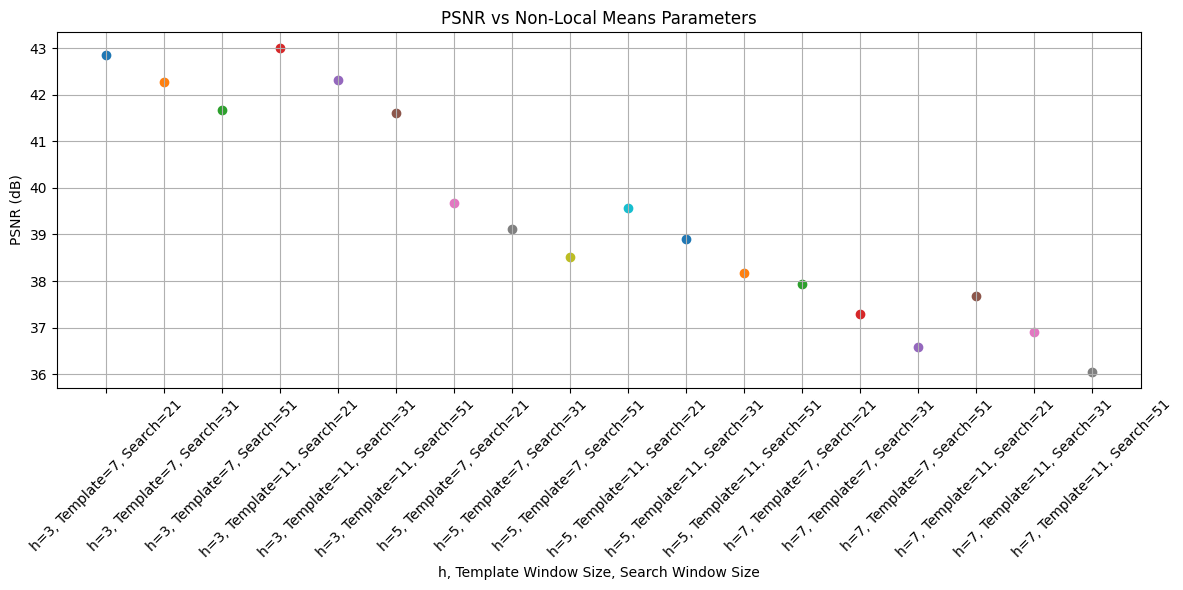

In [29]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
from itertools import product

def apply_non_local_means(image, h=3, templateWindowSize=7, searchWindowSize=21):
    """
    Apply Non-Local Means Denoising to the image.

    Parameters:
    - image: Input image (grayscale or color).
    - h: Filter strength.
    - templateWindowSize: Size of the template patch used for denoising.
    - searchWindowSize: Size of the window used for searching similar patches.

    Returns:
    - Denoised image.
    """
    if image.dtype != np.uint8:
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    denoised_image = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)
    return denoised_image

def optimize_non_local_means(image, h_values=[3, 5, 7], templateWindowSizes=[7, 11], searchWindowSizes=[21, 31, 51]):
    """
    Optimize Non-Local Means denoising parameters based on PSNR.

    Parameters:
    - image: Input image (grayscale or color).
    - h_values: List of filter strengths to try.
    - templateWindowSizes: List of template window sizes to try.
    - searchWindowSizes: List of search window sizes to try.

    Returns:
    - List of results containing parameters and their corresponding PSNR values.
    """
    results = []
    
    # Loop over each combination of parameters
    for h, templateWindowSize, searchWindowSize in product(h_values, templateWindowSizes, searchWindowSizes):
        denoised_image = apply_non_local_means(image, h, templateWindowSize, searchWindowSize)
        current_psnr = psnr(image, denoised_image)
        
        results.append((h, templateWindowSize, searchWindowSize, current_psnr))

    return results

# Load your image
image_path = 'path_to_your_image.jpg'  # Replace with your image path
image = unsharp_image  # Read image as grayscale

# Optimize Non-Local Means parameters
results = optimize_non_local_means(image)

# Find the optimal parameters (the ones with the highest PSNR)
optimal_result = max(results, key=lambda x: x[3])  # Get the result with maximum PSNR
optimal_h, optimal_templateWindowSize, optimal_searchWindowSize, optimal_psnr = optimal_result

# Print the optimal parameters and their PSNR
print(f"Optimal h: {optimal_h}, Optimal Template Window Size: {optimal_templateWindowSize}, Optimal Search Window Size: {optimal_searchWindowSize}, PSNR: {optimal_psnr:.2f} dB")

# Prepare data for plotting
hs = [result[0] for result in results]
template_sizes = [result[1] for result in results]
search_sizes = [result[2] for result in results]
psnr_values = [result[3] for result in results]

# Create a figure
plt.figure(figsize=(12, 6))

# Plot PSNR vs Parameters
for (h, template_size, search_size), psnr_value in zip(zip(hs, template_sizes, search_sizes), psnr_values):
    plt.scatter(f'h={h}, Template={template_size}, Search={search_size}', psnr_value, marker='o')

plt.title('PSNR vs Non-Local Means Parameters')
plt.xlabel('h, Template Window Size, Search Window Size')
plt.ylabel('PSNR (dB)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


In [41]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define directories
dir_a = r"C:\projects\ip\Data\train\image" # Original images
dir_b = r"C:\projects\ip\Data\train\mask"  # Hand-labeled masks
dir_c =r"C:\projects\ip\Data\train\processed_mask"  # Processed masks
output_dir = r"C:\projects\ip\Data\train\comparision"  # Directory to save side-by-side comparisons

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Get the list of image filenames (assuming all directories have the same filenames)
image_files = sorted(os.listdir(dir_a))

# Loop through all the images
for img_file in image_files:
    # Load images from each directory
    img_a = Image.open(os.path.join(dir_a, img_file))
    img_b = Image.open(os.path.join(dir_b, img_file))
    img_c = Image.open(os.path.join(dir_c, img_file))
    
    # Create a figure with 3 subplots (side-by-side)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display original image
    axes[0].imshow(img_a)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display hand-labeled mask
    axes[1].imshow(img_b, cmap='gray')
    axes[1].set_title('Hand-Labeled Mask')
    axes[1].axis('off')

    # Display processed mask
    axes[2].imshow(img_c, cmap='gray')
    axes[2].set_title('Processed Mask')
    axes[2].axis('off')

    # Save the side-by-side comparison
    comparison_output_path = os.path.join(output_dir, img_file)
    plt.savefig(comparison_output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    print(f'Saved comparison for {img_file}')


Saved comparison for 0.png
Saved comparison for 1.png
Saved comparison for 10.png
Saved comparison for 11.png
Saved comparison for 12.png
Saved comparison for 13.png
Saved comparison for 14.png
Saved comparison for 15.png
Saved comparison for 16.png
Saved comparison for 17.png
Saved comparison for 18.png
Saved comparison for 19.png
Saved comparison for 2.png
Saved comparison for 20.png
Saved comparison for 21.png
Saved comparison for 22.png
Saved comparison for 23.png
Saved comparison for 24.png
Saved comparison for 25.png
Saved comparison for 26.png
Saved comparison for 27.png
Saved comparison for 28.png
Saved comparison for 29.png
Saved comparison for 3.png
Saved comparison for 30.png
Saved comparison for 31.png
Saved comparison for 32.png
Saved comparison for 33.png
Saved comparison for 34.png
Saved comparison for 35.png
Saved comparison for 36.png
Saved comparison for 37.png
Saved comparison for 38.png
Saved comparison for 39.png
Saved comparison for 4.png
Saved comparison for 40.p

In [44]:
import os
from PIL import Image

# Define the directory containing the comparison images
comparison_dir = r"C:\projects\ip\Data\train\comparision"   # Directory with the comparison images
output_file = r"C:\projects\ip\Data\comparison.png"  # Path for saving the final image

# Get the list of image filenames and take the first 20
image_files = sorted(os.listdir(comparison_dir))[:20]

# Open the first image to get the size (assuming all images have the same size)
first_image = Image.open(os.path.join(comparison_dir, image_files[0]))
width, height = first_image.size

# Create a new blank image with height for 20 stacked images
total_height = height * len(image_files)
combined_image = Image.new('RGB', (width, total_height))

# Paste each comparison image into the combined image
y_offset = 0
for img_file in image_files:
    img = Image.open(os.path.join(comparison_dir, img_file))
    combined_image.paste(img, (0, y_offset))
    y_offset += height  # Move the y_offset down by the height of the image

# Save the final stacked image
combined_image.save(output_file)

print(f'Saved the combined comparison image to {output_file}')


Saved the combined comparison image to C:\projects\ip\Data\comparison.png


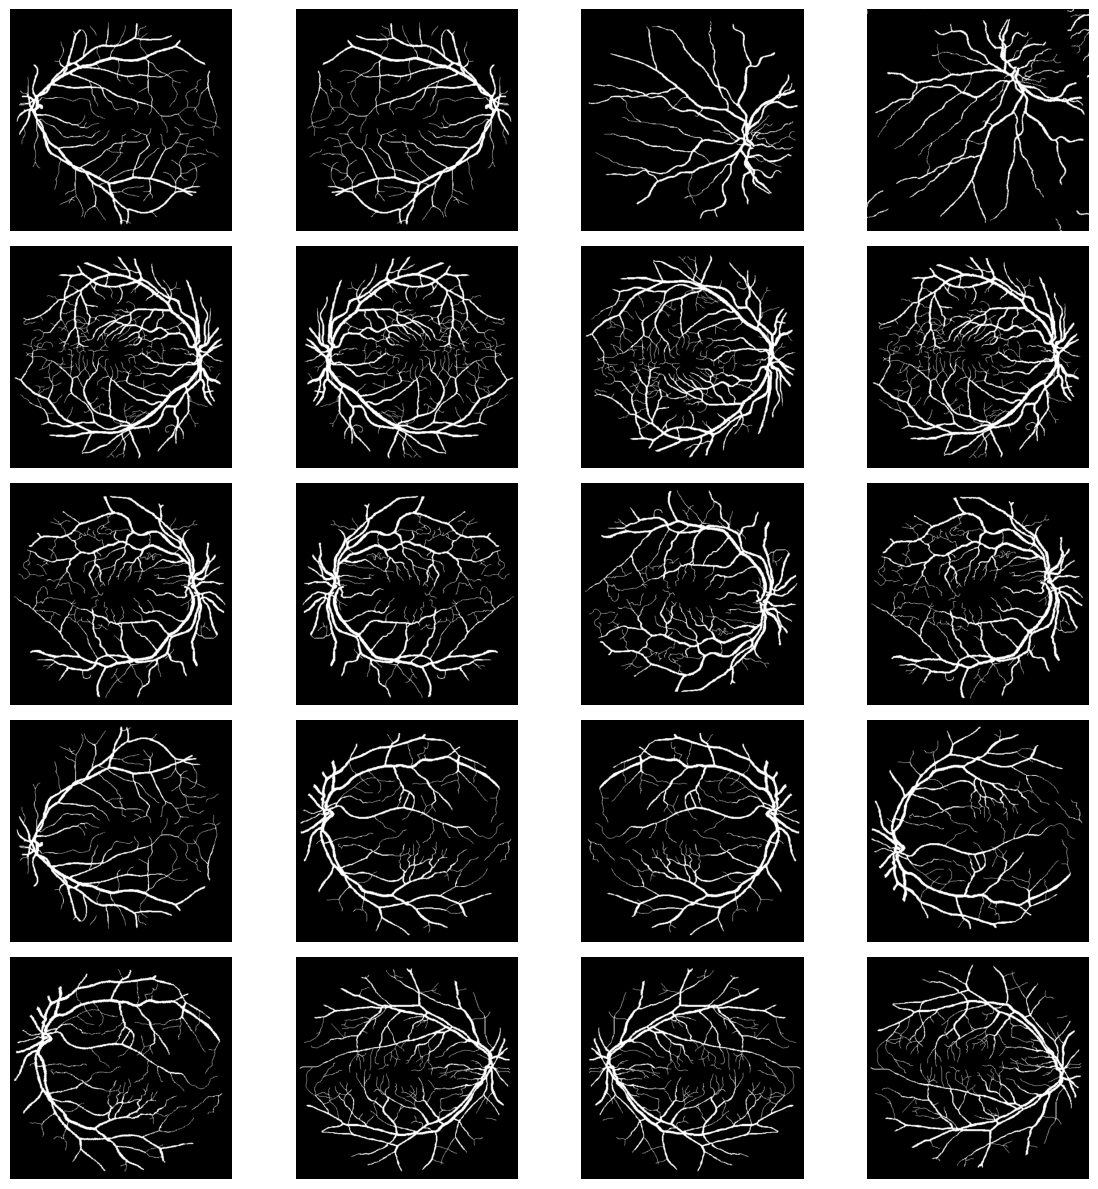

In [53]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the directory where your images are stored
image_dir = r"C:\projects\ip\Data\train\mask" 
# Get all the image file names
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Limit to the first 20 images
image_files = image_files[:20]

# Set up the number of rows and columns for displaying the images
n_cols = 4  # Number of columns you want in the grid
n_rows = len(image_files) // n_cols + (len(image_files) % n_cols > 0)

# Create the plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Loop through the images and plot them
for i, img_file in enumerate(image_files):
    img = mpimg.imread(os.path.join(image_dir, img_file))
    ax = axes[i // n_cols, i % n_cols]  # Get the position in the grid
    ax.imshow(img,cmap='gray')
    ax.axis('off')  # Hide axis

# Remove any empty subplots if necessary
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()


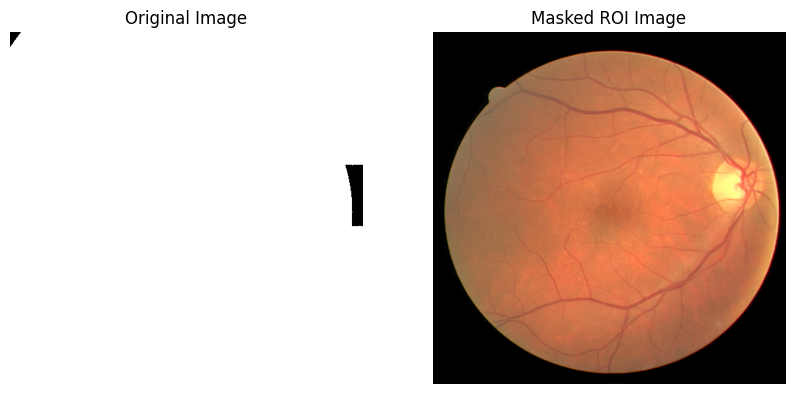

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fundus image
image_path = IMAGE_PATH# Update with your actual image path
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to isolate the bright area of the fundus
    _, binary_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

    # Use morphological operations to clean up the mask (optional, if needed)
    kernel = np.ones((5, 5), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    # Mask the image
    masked_image = cv2.bitwise_and(image, image, mask=binary_mask)

    # Display the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title("Masked ROI Image")
    plt.axis("off")

    plt.show()


In [10]:
cv2.imshow("Original Image", mask)
cv2.imshow("Masked Image", masked_image)
cv2.waitKey(0)  # Wait for a key press to close the windows
cv2.destroyAllWindows()